In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('DATA/car_plate.jpg')

In [5]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)

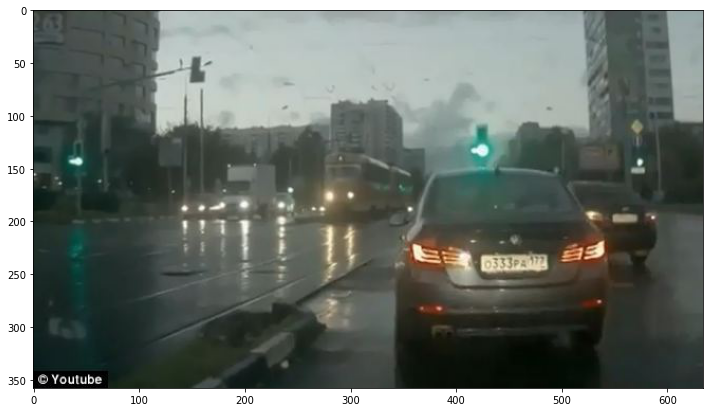

In [6]:
display_img(img)

In [7]:
plate_cc = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [13]:
def detect_plate(img):
    plate_img = img.copy()
    
    plate_rects = plate_cc.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,0,0),thickness=2)
    return plate_img

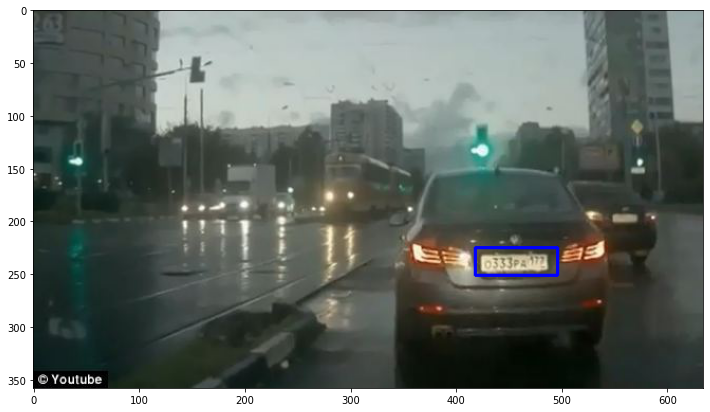

In [14]:
result = detect_plate(img)
display_img(result)

In [15]:
def blurr_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cc.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
    return plate_img

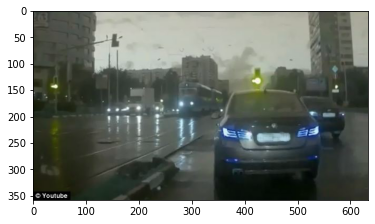

In [16]:
result = blurr_plate(img)
plt.imshow(result)